# Mall customer segmentation using several clustering algorithms


In [1]:
#Importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import skfuzzy as fuzz
import plotly.express as px

In [2]:
# Creating columns names
col_name = ["CustID", "Age", "Gender", "Income", "SpendScore"]

In [3]:
# Importing and creating dataframe
df = pd.read_csv("C:/Users/Otinwa Ayomide/Downloads/ML project/archive (9)/Shopping Mall Customer Segmentation Data .csv", names = col_name)

# Displaying first 5 samples of the data 
df.head()

CustID  Age  Gender         Income  \
0                           Customer ID  Age  Gender  Annual Income   
1  d410ea53-6661-42a9-ad3a-f554b05fd2a7   30    Male         151479   
2  1770b26f-493f-46b6-837f-4237fb5a314e   58  Female         185088   
3  e81aa8eb-1767-4b77-87ce-1620dc732c5e   62  Female          70912   
4  9795712a-ad19-47bf-8886-4f997d6046e3   23    Male          55460   

       SpendScore  
0  Spending Score  
1              89  
2              95  
3              76  
4              57

In [4]:
# Dropping unnecessary columns from the data
df.drop(["CustID", "Gender"], axis = 1, inplace = True)

# Removing the first row of the data
df.drop(index = 0, inplace = True)

In [5]:
df.head()

Age  Income SpendScore
1  30  151479         89
2  58  185088         95
3  62   70912         76
4  23   55460         57
5  24  153752         76

In [6]:
# Shape of the data
df.shape

(15079, 3)

In [7]:
# Describing the data
df.describe()

Age Income SpendScore
count   15079  15079      15079
unique     73  14441        100
top        86  49997         59
freq      249      3        175

In [8]:
# Displaying information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 1 to 15079
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         15079 non-null  object
 1   Income      15079 non-null  object
 2   SpendScore  15079 non-null  object
dtypes: object(3)
memory usage: 353.5+ KB


In [9]:
# Determining null values
df.isnull().sum()

Age           0
Income        0
SpendScore    0
dtype: int64

In [10]:
df.head()

Age  Income SpendScore
1  30  151479         89
2  58  185088         95
3  62   70912         76
4  23   55460         57
5  24  153752         76

In [11]:
#  Changing the data type
df = df.astype(int)

In [12]:
df.describe()

Age         Income    SpendScore
count  15079.000000   15079.000000  15079.000000
mean      54.191591  109742.880562     50.591617
std       21.119207   52249.425866     28.726977
min       18.000000   20022.000000      1.000000
25%       36.000000   64141.000000     26.000000
50%       54.000000  109190.000000     51.000000
75%       72.000000  155008.000000     75.000000
max       90.000000  199974.000000    100.000000

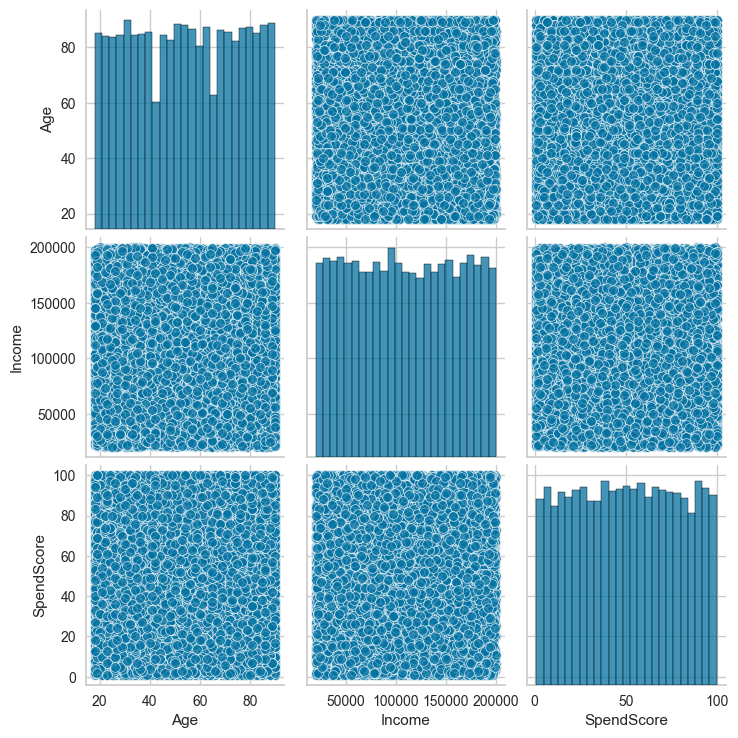

In [13]:
# Plotting the relationship between columns
sns.pairplot(df, plot_kws={'alpha': 0.7})
plt.show()


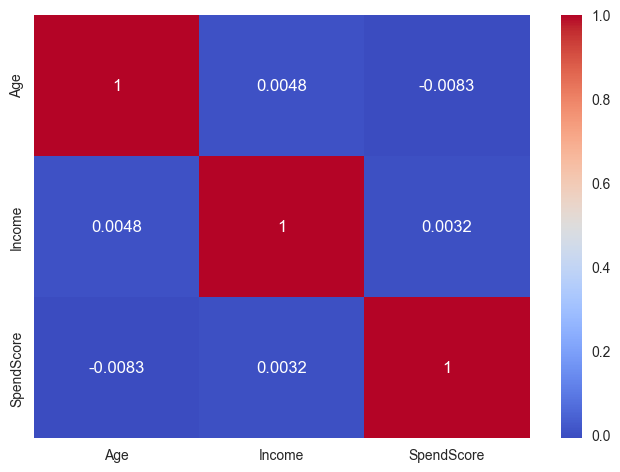

In [14]:
# correlation plot between features
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show() 

In [15]:
# Standardizing the dataframe
df_scale = df.iloc[:, 1:]
scaler = StandardScaler()
x = scaler.fit_transform(df_scale)

In [16]:
# Standardized data
x

array([[ 0.79881267,  1.33705873],
       [ 1.44207552,  1.54592857],
       [-0.74320756,  0.88450743],
       ...,
       [ 0.04965041, -0.09021845],
       [-0.2953409 , -1.58711891],
       [-0.60668478, -1.69155383]])

# KMeans Clustering

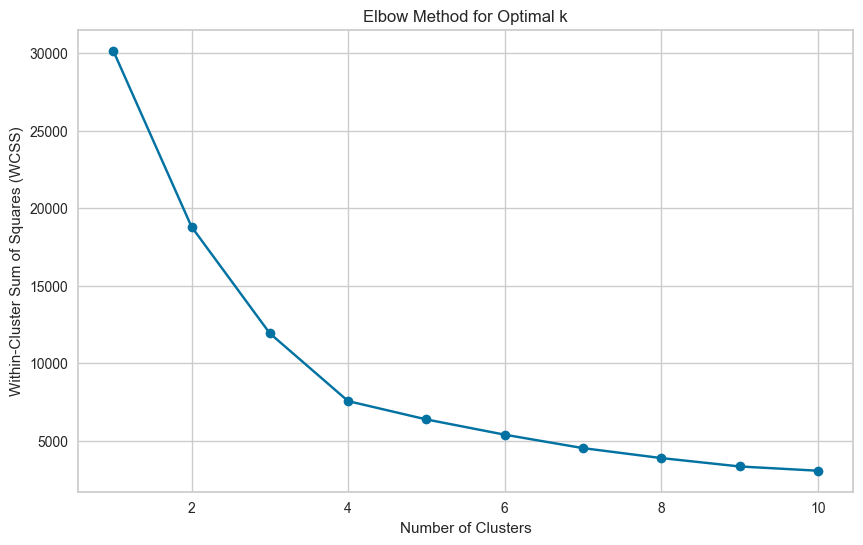

In [17]:
# Elbow plot for K-Means clustering
wcss = []
# Loop through different values of k from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Initializing the size of the plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

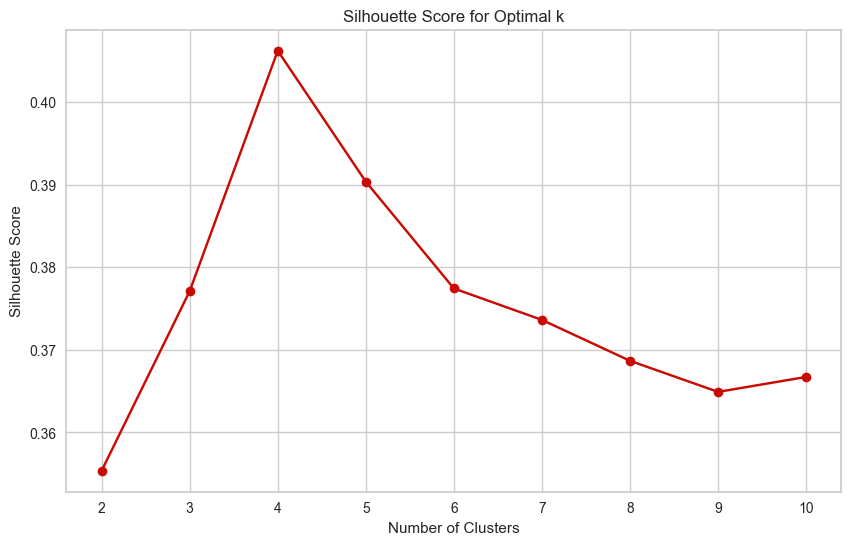

In [18]:
# Silhouette plot for K-means 
silhouette_scores = []

# Looping through different values of k from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(x)
    score = silhouette_score(x, cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

In [19]:
# Apply KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit_predict(x)

# Adding the predicted cluster labels to the DataFrame
df["k_clusters"] = kmeans.labels_

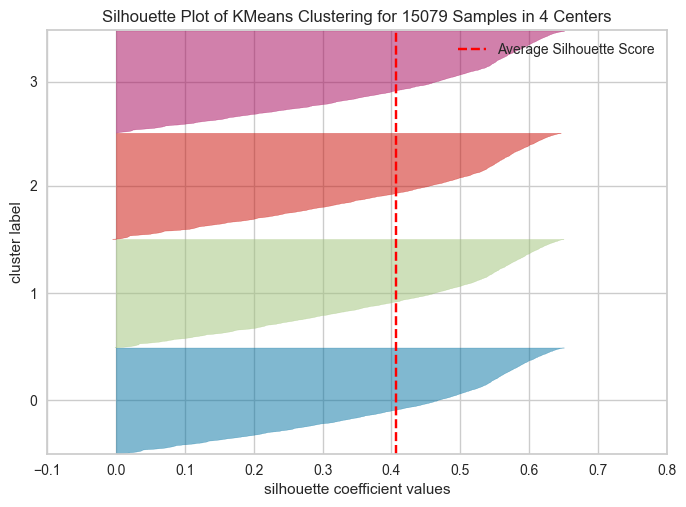

In [20]:
# Using the SilhouetteVisualizer to visualize clustering performance
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(x)
visualizer.show()
plt.show()


In [21]:
# Calculating the average silhouette score for the clusters in the DataFrame
silhouette_avg = silhouette_score(x, df["k_clusters"])
print(f"Silhouette Coefficient: {silhouette_avg}")


Silhouette Coefficient: 0.4062145400231557


In [22]:
# Created a 3D scatter plot using Plotly using the labels as color
fig = px.scatter_3d(df, x="Income", y="SpendScore", z="Age", color=df['k_clusters'], size_max=30)

fig.update_layout(
    width=1000,  
    height=800,  
    title="KMeans 3D Scatter Plot", 
)

# Displaying the plot
fig.show()


# KMeans ++

In [23]:
#Creating another model using the K-means ++ initializer

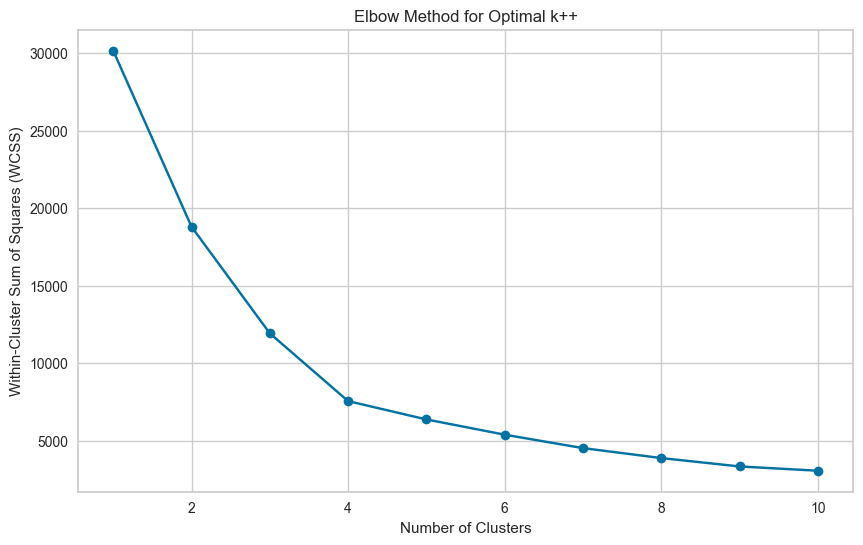

In [24]:
wcss2 = []

for k in range(1, 11):
    # included the Kmeans initializer
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss2.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss2, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k++')
plt.show()

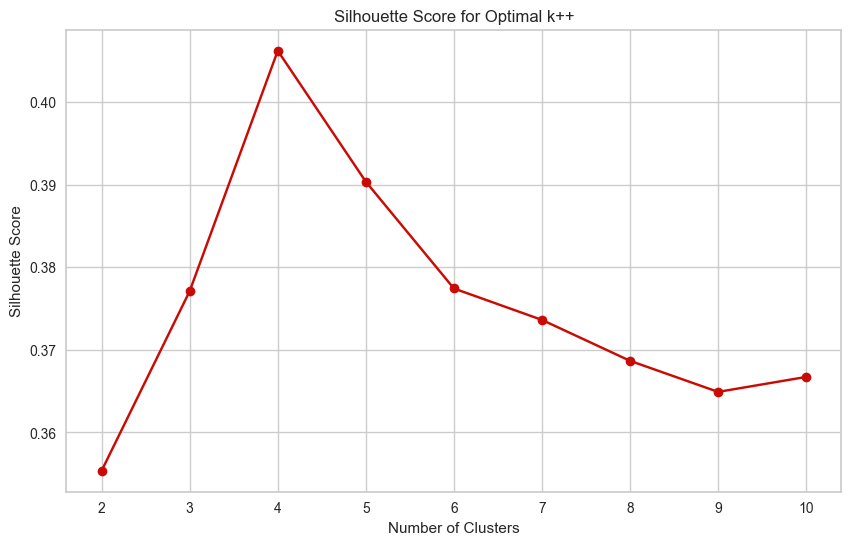

In [25]:
silhouette_scores2 = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init = 'k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(x)
    score = silhouette_score(x, cluster_labels)
    silhouette_scores2.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores2, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k++')
plt.show()

In [26]:
# Creating the K-means ++ model
kmeans_p = KMeans(n_clusters=4, init = "k-means++", random_state=42)
kmeans_p.fit_predict(x)
df["k_clusters_p"] = kmeans_p.labels_

In [27]:
# Calculating the silhouette coefficient of the labels
silhouette_avg = silhouette_score(x, df["k_clusters_p"])
print(f"Silhouette Coefficient: {silhouette_avg}")

Silhouette Coefficient: 0.4062145400231557


In [28]:
#3D plot of the k-means++ clusters
fig=px.scatter_3d(df, x="Income", y="SpendScore", z = "Age", color=df['k_clusters_p'], size_max=30)

fig.update_layout(
    width=1000,
    height=800,  
    title="KMeans++ 3D scatter Plot ",
)

fig.show()

# Hierarchial CLUSTERING


In [29]:
# Agglomerative Hierarchical Clustering

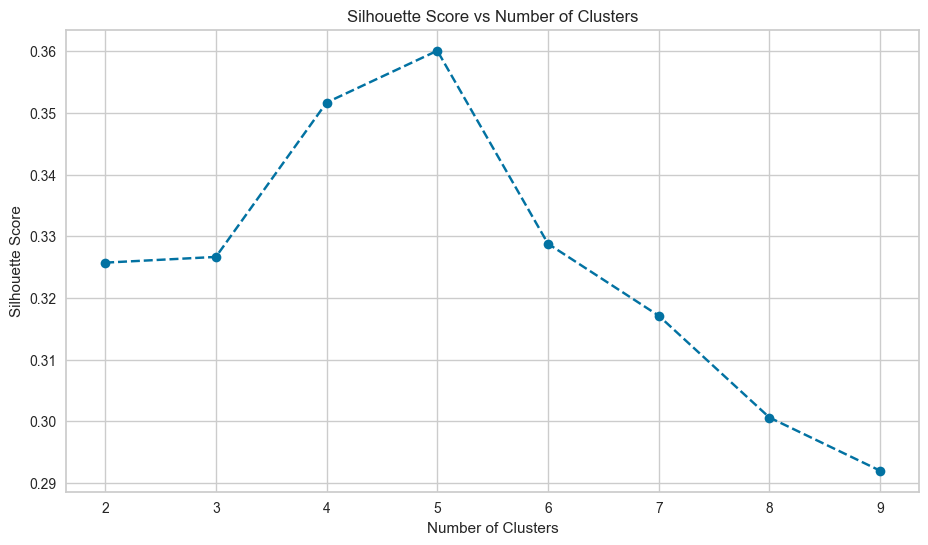

In [30]:
# Calculating the silhouette score from a range 2 - 10
Agg_silhouette_scores = []

for n_clusters in range(2,10):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    labels = agg_clustering.fit_predict(x)
    sil_score = silhouette_score(x, labels)
    Agg_silhouette_scores.append(sil_score)


plt.figure(figsize=(11, 6))
plt.plot(range(2,10), Agg_silhouette_scores, marker='o', linestyle='--')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

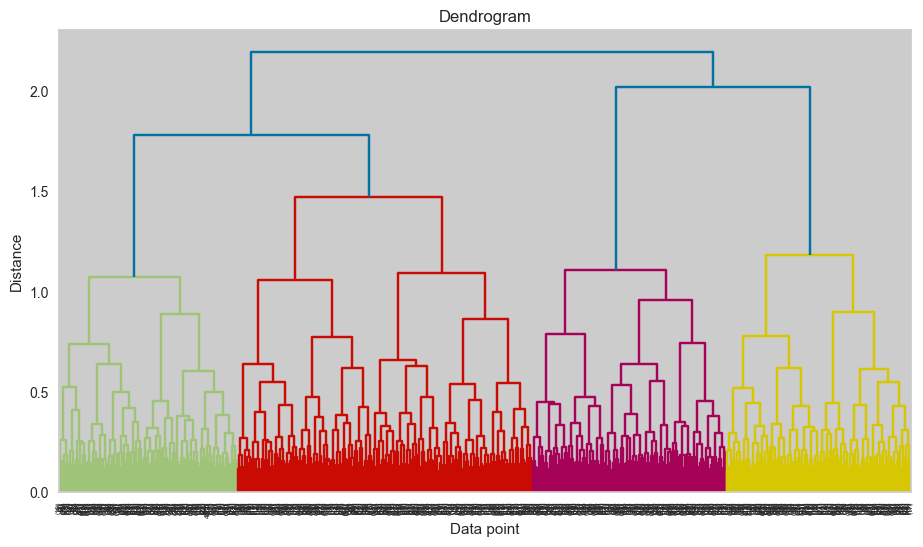

In [31]:
# Generating and plotting the dendrogram for hierarchical clustering
Z = linkage(x, 'average')

plt.figure(figsize=(11, 6))
plt.title('Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode = "lastp", p = 1000)
plt.show()

In [32]:
# Creating the model and assigning labels
agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(x)
df['Agg_Labels'] = agglom.labels_


In [33]:
# Calculating the silhouette score
Agg_sil_score = silhouette_score(x, df["Agg_Labels"])

print(f"Silhouette Score for Agglomerative Clustering: {Agg_sil_score}")

Silhouette Score for Agglomerative Clustering: 0.3601076101336627


In [34]:
# Created a 3D scatter plot to visualize Agglomerative Clustering results
fig=px.scatter_3d(df, x="Income", y="SpendScore", z = "Age", color=df['Agg_Labels'], size_max=30)

fig.update_layout(
    width=1000,
    height=800,  
    title="Agglomerative Scatter Plot",
)

fig.show()

# GaussianMixture Clustering


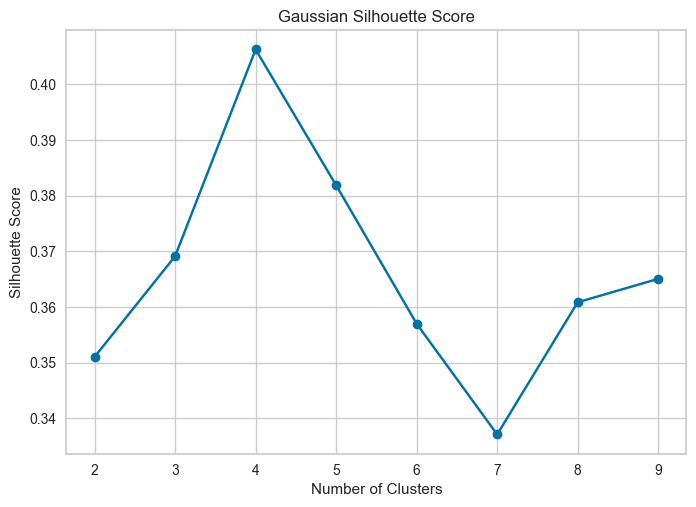

In [35]:
# Calculate and plotted the Silhouette Score for different numbers of clusters in Gaussian Mixture Model
silhouette_scores = []

for n in range(2,10):
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(x)
    labels = gmm.predict(x)
    score = silhouette_score(x, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Gaussian Silhouette Score")
plt.show()


In [36]:
# Creating the model and assigning labels to the dataframe
gmm = GaussianMixture(n_components=4, random_state=42).fit(x)
df["GM_label"] = gmm.predict(x)

In [37]:
# Calculate and print the Silhouette Score for Gaussian Mixture Clustering
GM_sil_score = silhouette_score(x, df["GM_label"])

print(f"Silhouette Score for Gaussian Mixture Clustering: {GM_sil_score}")

Silhouette Score for Gaussian Mixture Clustering: 0.40626587748790594


In [38]:
# 3D scatter plot for visualizing Gaussian Mixture clustering results
fig=px.scatter_3d(df, x="Income", y="SpendScore", z = "Age", color=df['GM_label'], size_max=30)

fig.update_layout(
    width=1000,
    height=800,  
    title="Gaussian Mixture Scatter Plot",
)

fig.show()

# Fuzzy C-Means

In [39]:
# Transpose the data matrix 'x'
x_t = x.T

In [40]:
# Calculate Silhouette Scores for Fuzzy C-Means clustering with different numbers of clusters
silhouette_scores_fuzzy = []

for n_clusters in range(2, 10):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        x.T, c=n_clusters, m=2.0, error=0.005, maxiter=1000
    )
    labels = np.argmax(u, axis=0)
    silhouette_scores_fuzzy.append(silhouette_score(x, labels))


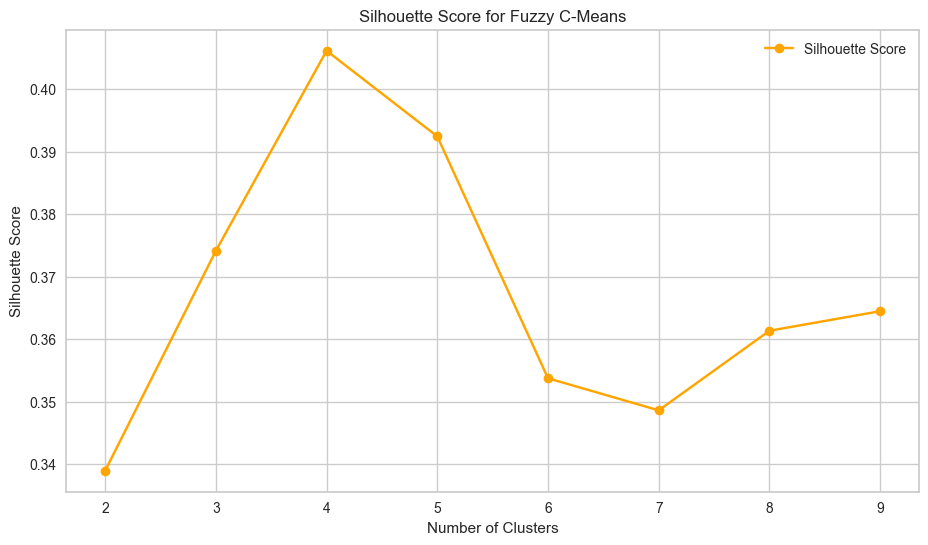

In [41]:
# Plot the Silhouette Score for different numbers of clusters in Fuzzy C-Means
plt.figure(figsize=(11, 6))
plt.plot(range(2, 10), silhouette_scores_fuzzy, 'o-', label='Silhouette Score', color='orange')
plt.title('Silhouette Score for Fuzzy C-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()


In [ ]:
# Performing the fuzzy c-means clustering
cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
    x.T, c=4, m=2.0, error=0.005, maxiter=1000
)
# Assigned the cluster labels based on the highest membership value
df["fuzz_labels"] = np.argmax(u, axis=0)

In [43]:
# Calculate and print the Silhouette Score for Fuzzy Clustering
fuzz_sil_score = silhouette_score(x, df["fuzz_labels"])

print(f"Silhouette Score for fuzzy Clustering: {fuzz_sil_score}")

Silhouette Score for fuzzy Clustering: 0.4061128624298844


In [ ]:
# 3D scatter plot for clustering results
fig=px.scatter_3d(df, x="Income", y="SpendScore", z = "Age", color=df['fuzz_labels'], size_max=30)

fig.update_layout(
    width=1000,
    height=800,  
    title="Fuzzy C-Means Scatter Plot",
)

fig.show()

In [45]:
# Dataframe with all the cluster labels
df

Age  Income  SpendScore  k_clusters  k_clusters_p  Agg_Labels  \
1       30  151479          89           0             0           2   
2       58  185088          95           0             0           2   
3       62   70912          76           2             2           1   
4       23   55460          57           2             2           4   
5       24  153752          76           0             0           2   
...    ...     ...         ...         ...           ...         ...   
15075   29   97723          30           1             1           3   
15076   22   73361          74           2             2           1   
15077   18  112337          48           3             3           1   
15078   26   94312           5           1             1           3   
15079   19   78045           2           1             1           3   

       GM_label  fuzz_labels  
1             0            0  
2             0            0  
3             2            3  
4             2            3  
5             0            0  
...         ...          ...  
15075         1            2  
15076         2            3  
15077         1            1  
15078         1            2  
15079         1            2  

[15079 rows x 8 columns]